In [1]:
from bioio import BioImage
import matplotlib.pyplot as plt
from bioio_plotter.lut import Lut
from bioio_plotter.image_display import ImageDisplay
from bioio_plotter.converter import convert_to_rgb
from bioio_plotter.percentile import Percentile
from bioio_plotter import colors

In [2]:
cache_folder = ""   # define a folder where images will be stored. Leave blank not to use any cache

In [3]:
# Define a utility function to find or download an image

from pathlib import Path
import tempfile
import urllib

if cache_folder != "":
    Path(cache_folder).mkdir(parents=True, exist_ok=True)

def get_image(image_name, image_url):
    if cache_folder == "":
        directory = None
        file_path = None
    else:
        directory = Path(cache_folder)
        file_path = directory / image_name
    
    if file_path is None or not(file_path.exists()):
        print(f"Downloading {image_url}...")
        path, _ = urllib.request.urlretrieve(image_url, filename=file_path)
        path = Path(path)
        path = path.rename(Path(path.parent, image_name))
        print(f'{image_name} saved to {path}')
    else:
        path = file_path
        print(f'{image_name} found in {file_path}')

    return path

mitosis.tif saved to /var/folders/zt/w6w5hpx561d_n1n6613yy7dh0000gt/T/mitosis.tif


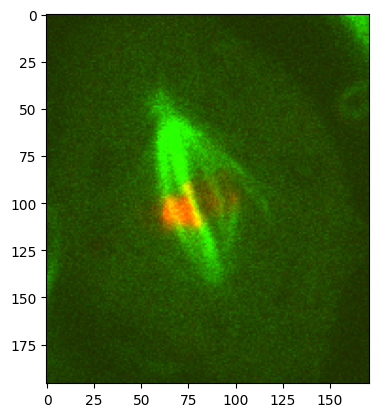

In [4]:
complex_img_path = get_image("mitosis.tif", "https://imagej.net/ij/images/mitosis.tif")
complex_img = BioImage(complex_img_path)

image_display = ImageDisplay([
    Lut(color=colors.RED, min=0, max=15000),
    Lut(color=colors.GREEN, min=0, max=Percentile(99))
])
t = 25
z = 2

array = convert_to_rgb(complex_img.data, image_display, t = t, z = z)

fig, ax = plt.subplots()
ax.imshow(array)

CMU-1.jpg saved to /var/folders/zt/w6w5hpx561d_n1n6613yy7dh0000gt/T/CMU-1.jpg


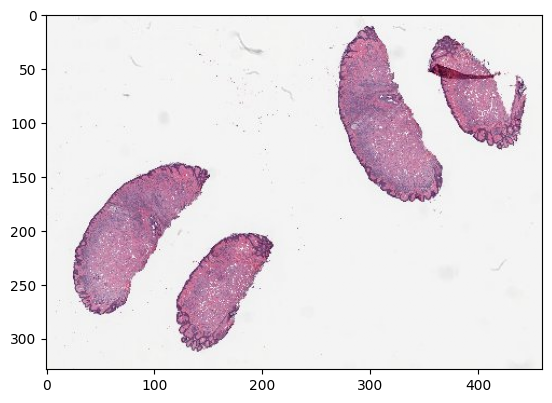

In [5]:
rgb_img_path = get_image("CMU-1.jpg", "https://qupath.readthedocs.io/en/0.5/_images/CMU-1.jpg")
rgb_img = BioImage(rgb_img_path)

image_display = ImageDisplay.create_rgb()

array = convert_to_rgb(rgb_img.data, image_display)

fig, ax = plt.subplots()
ax.imshow(array)